# Modern Portfolio Theory Using Efficient Frontier Theory

In [ ]:
# Import required packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Read required data
def ReadData(TypeOfData):
    Stocks = '/content/stocks.csv'
    TypeOfData == "Stocks"
    Data = pd.read_csv(Stocks)
    Ticker = "ticker"
    Timeperiod = 252
    return Data, Ticker

Text(0.5, 1.0, 'Variation in daily returns for stocks')

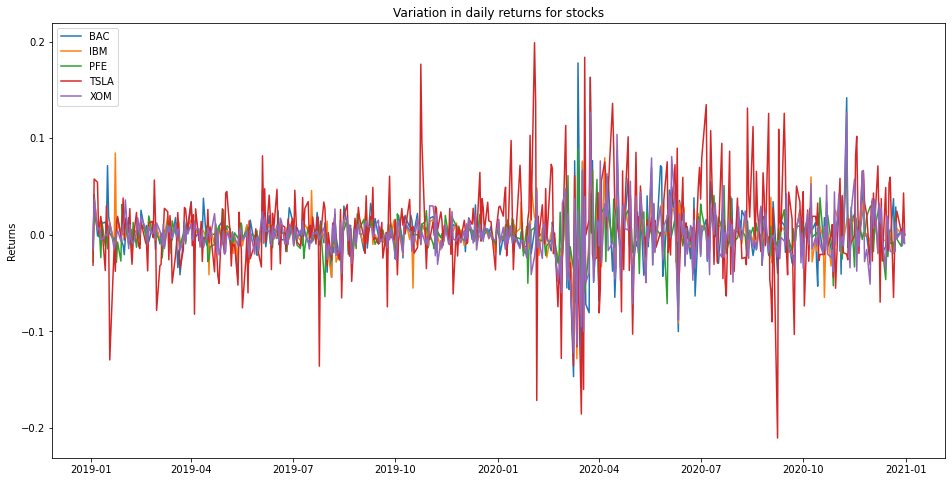

In [ ]:
TypeOfData = "Stocks"
Data, Ticker = ReadData(TypeOfData)
# Extract necessary columns
Data = Data[['Date', Ticker, 'Close']]

# Convert to date format
Data['Date'] = pd.to_datetime(Data['Date'])
Data['Date'] = Data['Date'].dt.date

# Performing pivot operation so as to obtain wide form data from long form data, each column represents a cryptocurrency
Table = Data.pivot(index='Date',columns=Ticker,values='Close') 

# Column names
ColNames = Table.columns.values

# Obtain daily returns table using pct_change()
Returns = Table.pct_change()

# Generate a graph to understand variation in daily returns of each asset
plt.figure(figsize=(16, 8))
for Col in ColNames:
    plt.plot(Returns.index, Returns[Col],label=Col)
plt.ylabel('Returns')
plt.legend(loc='upper left')
plt.title("Variation in daily returns for stocks")

In [ ]:
# Generate random portfolios
def EfficientFrontier(AvgReturns, Covariance, CountPortfolio, RFF):
    # Obtain portfolio return and standard deviation
    WeightHolder = []
    Res = np.zeros((3,CountPortfolio))
    for j in range(CountPortfolio):
        # We have 5 assets in our portfolio, hence initializing 6 dummy weights
        Wei = np.random.random(5)
        Wei /= np.sum(Wei)
        WeightHolder.append(Wei)
        
        # Calculating standard deviation and portfolio returns using portfolio weights, covariance matrix, returns
        Por_SD = np.sqrt(np.dot(Wei.T, np.dot(Covariance, Wei))) * np.sqrt(252)
        Por_Return = np.sum(AvgReturns*Wei ) * 252
        
        # Storing std dev and portfolio returns in results variable
        Res[0,j] = Por_SD
        Res[1,j] = Por_Return
        Res[2,j] = (Por_Return - RFF) / Por_SD

    # We need to generate datasets associated with max sharpe ratio and min volatility values
    VolatilityIndexMin = np.argmin(Res[0])
    MinVolSD, MinVolReturn = Res[0,VolatilityIndexMin], Res[1,VolatilityIndexMin]
    MinVolAllocation = pd.DataFrame(WeightHolder[VolatilityIndexMin],index=Table.columns,columns=['Alloc'])
    MinVolAllocation.Alloc = [round(i*100,2)for i in MinVolAllocation.Alloc]
    MinVolAllocation = MinVolAllocation.T
    
    SharpeIndexMax = np.argmax(Res[2])
    SDMaxSharpe, RetMaxSharpe = Res[0,SharpeIndexMax], Res[1,SharpeIndexMax]
    SharpeAllocationMax = pd.DataFrame(WeightHolder[SharpeIndexMax],index=Table.columns,columns=['Alloc'])
    SharpeAllocationMax.Alloc = [round(i*100,2)for i in SharpeAllocationMax.Alloc]
    SharpeAllocationMax = SharpeAllocationMax.T
    
    print("*" * 90)
    print("Portfolio Allocation for Minimum volatility\n")
    print("Portfolio Return Annual:", round(MinVolReturn,2))
    print("Portfolio Volatility Annual", round(MinVolSD,2))
    print("\n")
    print(MinVolAllocation)
    
    print("*" * 90)
    print("Portfolio Allocation for maximum sharpe ratio\n")
    print("Portfolio Return Annual:", round(RetMaxSharpe,3))
    print("Portfolio Volatility Annual", round(SDMaxSharpe,3))
    print("\n")
    print(SharpeAllocationMax)
    
    plt.figure(figsize=(14, 7))
    plt.savefig("mpt.png")
    plt.scatter(Res[0,:],Res[1,:],c=Res[2,:],cmap='YlGnBu', marker='o', s=6, alpha=0.5)
    plt.colorbar()
    plt.scatter(SDMaxSharpe,RetMaxSharpe, marker='*',color='g',s=300, label='Portfolio with Max Sharpe')
    plt.scatter(MinVolSD,MinVolReturn, marker='*',color='r',s=300, label='Portfolio with Min Volatility')
    plt.title('Modern Portfolio Theory using Efficient Frontier Theory')
    plt.xlabel('Volatility Annual')
    plt.ylabel('Returns Annual')
    plt.legend(labelspacing=0.6)

******************************************************************************************
Portfolio Allocation for Minimum volatility

Portfolio Return Annual: 0.08
Portfolio Volatility Annual 0.26


ticker   BAC    IBM    PFE  TSLA   XOM
Alloc   0.69  16.95  62.63  6.33  13.4
******************************************************************************************
Portfolio Allocation for maximum sharpe ratio

Portfolio Return Annual: 1.133
Portfolio Volatility Annual 0.576


ticker    BAC   IBM   PFE   TSLA   XOM
Alloc   17.06  4.08  2.44  74.74  1.68


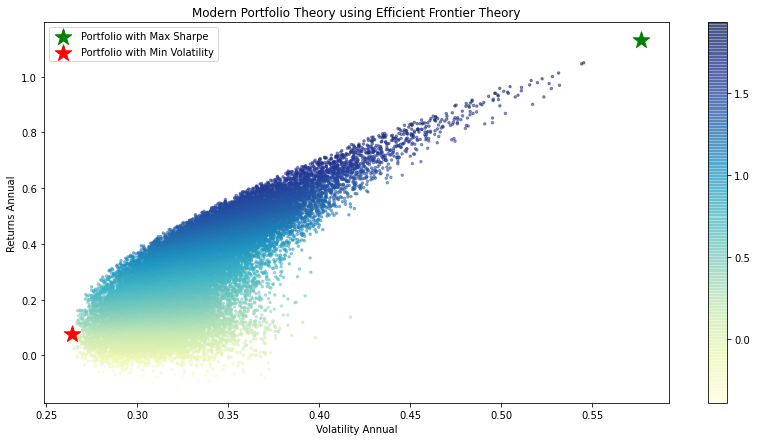

In [ ]:
# Declaring variable values required for function calls
CountPortfolio = 30000
RFF = 0.0178
AvgReturns = Returns.mean()
Covariance = Returns.cov()

# Main function call to generate efficient frontier theory visualization
EfficientFrontier(AvgReturns, Covariance, CountPortfolio, RFF)